## Bonus

In [1]:
from add_noise import add_noise
from gen import gen
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def adagrad(x, y, eta):
    m, n = x.shape
    w = np.append(np.ones(n), [-n])
    G = np.zeros(n+1)
    misclass = []
    hingeloss = []
    for i in range(50):
        total = 0
        hinge = 0
        for j in range(m):
            if (np.dot(w[:n], x[j, :]) + w[n]) * y[j] <= 0:
                total += 1
            if (np.dot(w[:n], x[j, :]) + w[n]) * y[j] <= 1:
                hinge += 1 - (np.dot(w[:n], x[j, :]) + w[n]) * y[j]
                # that gradient is -yx, and for $\theta$, it is always -y.
                g = np.append(-y[j] * x[j, :], -y[j])
                G += np.square(g)
                for k in range(n+1):
                    if G[k] != 0:
                        w[k] = w[k] - eta * g[k] / np.sqrt(G[k])
        misclass.append(total)
        hingeloss.append(hinge)
    return misclass, hingeloss



In [3]:
data_y, data_x = gen(10,20,40,10000,True)

In [6]:
misclass, hingeloss = adagrad(data_x, data_y, 1.5)

/Users/ShengliangDai/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


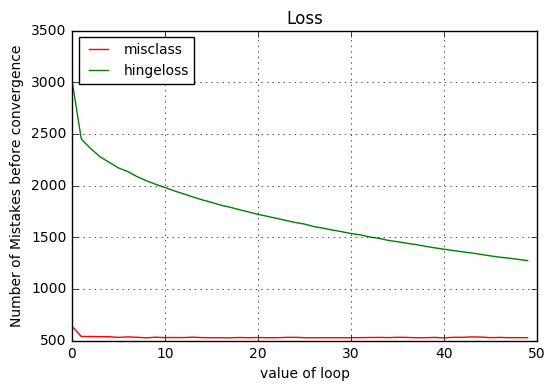

In [7]:
plt.gca().set_color_cycle(['red', 'green'])

plt.plot(misclass)
plt.plot(hingeloss)

plt.legend(['misclass', 'hingeloss'],
           loc='upper left', prop={'size':10})
plt.title('Loss')
plt.ylabel('Number of Mistakes before convergence')
plt.xlabel('value of loop')
plt.grid()
plt.show()

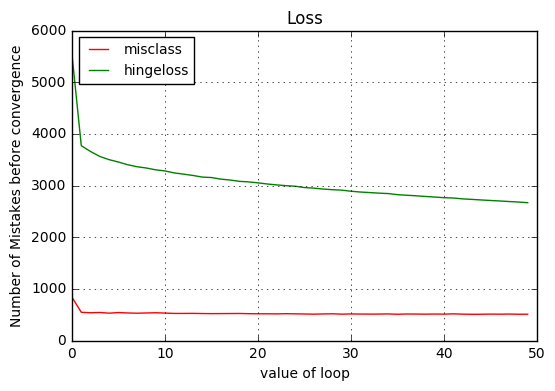

In [8]:
data_y, data_x = gen(10,20,80,10000,True)
misclass, hingeloss = adagrad(data_x, data_y, 1.5)
plt.gca().set_color_cycle(['red', 'green'])

plt.plot(misclass)
plt.plot(hingeloss)

plt.legend(['misclass', 'hingeloss'],
           loc='upper left', prop={'size':10})
plt.title('Loss')
plt.ylabel('Number of Mistakes before convergence')
plt.xlabel('value of loop')
plt.grid()
plt.show()

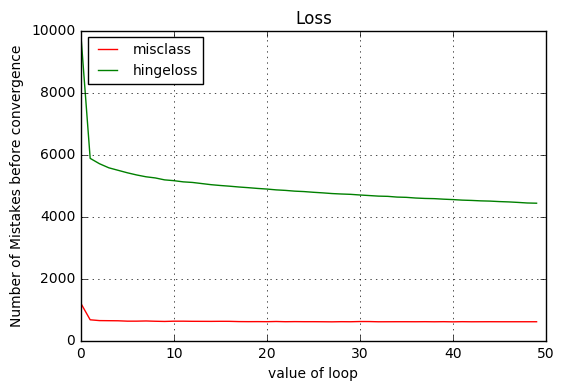

In [9]:
data_y, data_x = gen(10,20,120,10000,True)
misclass, hingeloss = adagrad(data_x, data_y, 1.5)
plt.gca().set_color_cycle(['red', 'green'])

plt.plot(misclass)
plt.plot(hingeloss)

plt.legend(['misclass', 'hingeloss'],
           loc='upper left', prop={'size':10})
plt.title('Loss')
plt.ylabel('Number of Mistakes before convergence')
plt.xlabel('value of loop')
plt.grid()
plt.show()

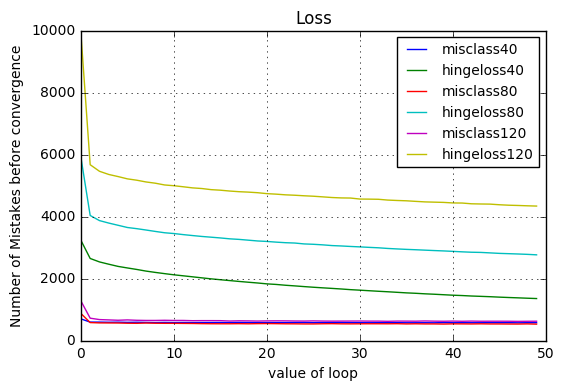

In [14]:
x_train, y_train = [], []
for step in range(40, 160, 40):
    data_y, data_x = gen(10,20,step,10000,True)
    x_train.append(data_x)
    y_train.append(data_y)

    misclass, hingeloss = adagrad(data_x, data_y, 1.5)
    #plt.gca().set_color_cycle(['red', 'green'])

    plt.plot(misclass)
    plt.plot(hingeloss)

    plt.legend(['misclass40', 'hingeloss40', 'misclass80', 'hingeloss80',
               'misclass120', 'hingeloss120'],
               loc='upper right', prop={'size':10})
    plt.title('Loss')
    plt.ylabel('Number of Mistakes before convergence')
    plt.xlabel('value of loop')
    plt.grid()
plt.show()